## Movie recommendation 
### Based on user's historical imdb_ratings and user'age

- Used 2 datasets for the the analysis and prediction 
1. ML-100k movie dataset (https://grouplens.org/datasets/movielens/)
2. IMDB 5000 movie dataset (https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

#### Project Description 
This machine learning project is carried out as part of CMPE 258 Machine learning labs under Prof. Ali Arsanjani

###### Background
Movie recommendation system can be build in the below given follwoing ways:
1. Content-Based Filtering
2. Memory-Based Collaborative Filtering
3. Model-Based Collaborative Filtering
4. Deep Learning / Neural Network

-- Currently there are many Movie recommendation system's are avilable. As a part of this project we are trying to recommend movie to the user based on user's previous rating (imdb_ratings), user's age and movies's content ratings.

Content Rating legends:
- G: General Audiences. All ages admitted.
- PG: Parental Guidance Suggested. Some material may not be suitable for children.
- PG-13: Parents Strongly Cautioned. Some material may be inappropriate for children under 13.
- R: Restricted. Under 17 requires accompanying parent or adult guardian.
- NC-17: No Children. No one 17 and under admitted.


#### Dataset 1 - ml100k movie dataset
- u.data - 100000 ratings by 943 users on 1682 items - user id | item id | rating | timestamp 
- u.item - Information about the items (movies) - movie id | movie title | release date | video release date |IMDb URL | unknown | Action | Adventure | Animation |Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |
- u.genre - A list of the genres
- u.user  - Demographic information about the users - user id | age | gender | occupation | zip code
- u.occupation - A list of the occupations

In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#ignore python warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Created panda data frame for u.data
rating_data = pd.read_csv('/Users/vidhsharma/Documents/SJSU/Fall18/ML/Lab/input/ml-100k/u.data', delim_whitespace=True, header=None)
rating_data.columns = ["user_id", "movie_id", "ratings", "timestamp"]
print(rating_data.shape)

(100000, 4)


In [6]:
np.unique(rating_data['ratings'])

array([1, 2, 3, 4, 5])

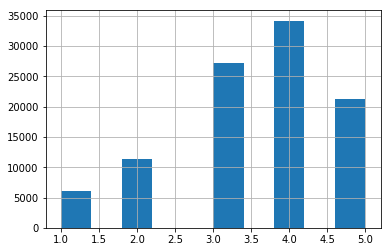

In [66]:
rating_data['ratings'].hist()

In [7]:
#Created panda data frame for u.user
user_data=pd.read_csv('/Users/vidhsharma/Documents/SJSU/Fall18/ML/Lab/input/ml-100k/u.user',sep='|',header=None)
user_data.columns=['user_id','age','gender','occupation','zip_code']
print(user_data.shape)

(943, 5)


In [74]:
#Merged u.data and u.user and create a new data frame
user_ratings_data=pd.merge(user_data,rating_data,on='user_id')
user_ratings_data.shape

(100000, 8)

In [75]:
user_ratings_data.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [83]:
np.unique(user_ratings_data['occupation'])

array(['administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer'],
      dtype=object)

In [84]:
# Converting categorical values to numerical
#user_ratings_date['ratings']=user_ratings_date['ratings'].map(lambda x: 1 if x>2 else 0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
user_ratings_data['gender'] = le.fit_transform(user_ratings_data['gender'])
user_ratings_data['occupation'] = le.fit_transform(user_ratings_data['occupation'])
user_ratings_data.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,1,19,85711,61,4,878542420
1,1,24,1,19,85711,189,3,888732928
2,1,24,1,19,85711,33,4,878542699
3,1,24,1,19,85711,160,4,875072547
4,1,24,1,19,85711,20,4,887431883


In [87]:
np.unique(user_ratings_data['occupation'])
#['administrator', 'artist', 'doctor', 'educator', 'engineer',
       #'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       #'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       #'salesman', 'scientist', 'student', 'technician', 'writer']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

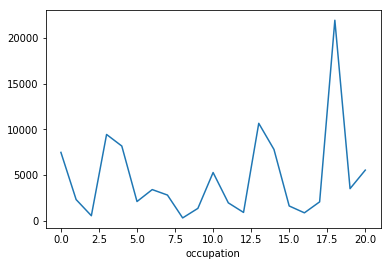

In [88]:
data_groupby_ratings = user_ratings_data.groupby(['occupation'])['ratings'].count()
data_groupby_ratings.plot()

In [11]:
np.unique(user_ratings_data['age'])

array([ 7, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 68, 69, 70, 73])

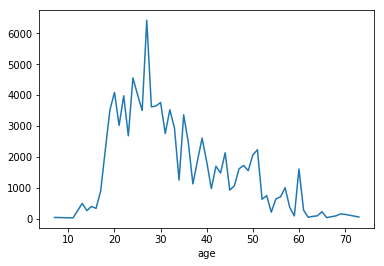

In [68]:
data_groupby_ratings = user_ratings_data.groupby(['age'])['ratings'].count()
data_groupby_ratings.plot()

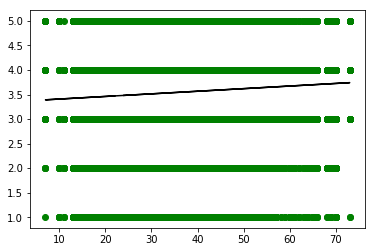

In [12]:
#Checking if there is any Linear Relationship between age and ratings
from sklearn import linear_model
from matplotlib import pyplot as plt
linear_reg = linear_model.LinearRegression() 
age_data=pd.DataFrame(user_ratings_data['age'])
ratings_data=user_ratings_data['ratings']
ratings_data.head()
linear_reg.fit(age_data, ratings_data)
plt.scatter(age_data, ratings_data,color='g')
plt.plot(age_data, linear_reg.predict(age_data),color='k')
plt.show()

### MODELS FOR PREDICTING USER RATING using user_ratings_data

In [13]:
#DecisionTree Classification to predict rating
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
X=user_ratings_data[['age','gender','occupation']].values;
y=user_ratings_data[['ratings']].values;
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X, y)
dtree_predictions = dtree_model.predict(X)

In [14]:
np.unique(dtree_predictions)

array([1, 3, 4, 5])

In [15]:
accuracy = dtree_model.score(X, y)
print(accuracy)

0.35203


In [16]:
# Naive bayes Classification to predict rating
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X, y.ravel())
gnb_predictions = gnb.predict(X)

In [17]:
np.unique(gnb_predictions)

array([4])

In [18]:
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)

0.34174


###### Adding Movie data with the current user data

In [19]:
#CURATING u.item data
#Creating panda dataframe for u.item 
movie_data=pd.read_csv('/Users/vidhsharma/Documents/SJSU/Fall18/ML/Lab/input/ml-100k/u.item',sep='|',header=None,encoding='latin-1')
#movie_data=movie_data.iloc[:,0:6]
movie_data.columns=['movie_id','movie_title','release_date','video_release_date','imdb_url','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#function to bucket movie years, create new feature movie decade
def movie_bucket(year):
    year=int(year);
    if (year<1970):
      return 1960;
    elif (year>=1970 and year<=1980):
      return 1980;
    elif (year>=1980 and year<=1990):
      return 1990;
    elif (year>=1990 and year<=2000):
      return 2000;
    elif (year>=2000 and year<=2010):
      return 2010;
    elif (year>2010):
      return 2020

# validating the function
str1="01-Jan-2011"
print(movie_bucket(int(str1.split('-')[2])));

2020


In [21]:
#Adding two new features movie_year and movie_decade to movie_data
movie_data.dropna(subset=["release_date"],inplace= True)
movie_data['movie_year']=movie_data['release_date'].str.split('-').str.get(2);
movie_data['movie_decade']=movie_data['movie_year'].apply(movie_bucket);

In [22]:
movie_data.shape

(1681, 26)

### Data Enrichment - mergeing IMDB dataset

#### Dataset 2 - imdb 5000 movie dataset 
- movie_title : Name of movie
- color : Movie is color or black and white
- duration : Duration of movie
- actor_1_name : Main actor 
- revenue : gross amount earned from a movie
- language : Language of movie 
- country : Which country it is released
- title_year : Movie releasing year
- content_rating : The Motion Picture Association of America (MPAA) film rating system is used in the United States and its territories to rate a film's suitability for certain audiences based on its content
- imdb_score : The score given by user for a particular movie

In [23]:
# Content Rating is not part of the data set , we need this in order to make sure we are recommending appropriate
# rated movies to the appropriate age group of users

In [24]:
#Getting content rating from IMDB
imdb_data=pd.read_csv('/Users/vidhsharma/Documents/SJSU/Fall18/ML/Lab/input/ml-100k/imdb_content_rating.csv')
# If content_rating is missing , adding default values as R (MOST RESTRICTED)
imdb_data['content_rating'].fillna('R',inplace=True)
imdb_data[imdb_data['content_rating'].isnull()]

,movie_title,content_rating


In [25]:
imdb_data.shape

(5043, 2)

In [26]:
#Merging movie data set and IMDB data set
movie_data['movie_title']=movie_data['movie_title'].map(lambda x:x.split("(")[0].rstrip())
np.size(np.unique(movie_data['movie_title']))

1657

In [27]:
# merge u.item and imdb_cr to create a new data frame
movies_imdb_data=pd.merge(movie_data,imdb_data,on='movie_title',how='left')

In [28]:
np.size(np.unique(movies_imdb_data['movie_title']))

1657

### Merging user_ratings_data and movies_imdb_data

In [29]:
# merge u.user, u.data, u.item and create a new data frame
user_movies_data=pd.merge(user_ratings_data,movies_imdb_data,on='movie_id',how='left')

In [30]:
user_movies_data['content_rating'].fillna("R",inplace=True)

In [31]:
np.unique(user_movies_data['content_rating'])

array(['R'], dtype=object)

In [32]:
np.unique(user_movies_data['ratings'])

array([1, 2, 3, 4, 5])

In [33]:
# Label encoding content_rating
user_movies_data['content_rating']=le.fit_transform(user_movies_data['content_rating'])

In [34]:
np.unique(user_movies_data['content_rating'])

array([0])

In [35]:
np.unique(user_movies_data['ratings'])

array([1, 2, 3, 4, 5])

In [36]:
user_movies_data.dropna(subset=['movie_year'],inplace=True)
print(user_movies_data[user_movies_data['movie_year'].isna()]['movie_year'])

Series([], Name: movie_year, dtype: object)


### Models for predicting 'user ratings' using user_movies_data

In [65]:
#Creating Training and Testing Set
X=user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].values;
y=user_movies_data[['ratings']].values;

In [38]:
#Spliting for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .3, random_state = 1)

###### Naive Bayes

In [39]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [40]:
np.unique(gnb_predictions)

array([2, 3, 4, 5])

In [41]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.3081205413694246


##### Logistics Regression

In [92]:
# Running LogisticRegression on new data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
lr_predictions = logisticRegr.predict(X_test)

In [93]:
# accuracy
accuracy = logisticRegr.score(X_test, y_test)
print(accuracy)

0.5764351230105438


##### Binary Classification to Predict liked movies

In [44]:
# function to create a new feature liked based on user rating
# user rating > 3, user liked the movie
# user rating <= 3, user did not like the movie
def like_identification(rating):
        if(rating>3):
            liked=1
        else:
            liked=0  
        return liked;    
print(like_identification(4))  

1


In [45]:
# Apply like_identification to new data set
user_movies_data['liked']=user_movies_data['ratings'].map(lambda x: like_identification(x))
np.unique(user_movies_data['liked'])

array([0, 1])

In [46]:
y=user_movies_data[['liked']].values;
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .7, random_state = 1)

##### Logistics Regression

In [47]:
# Running LogisticRegression to predict binary target
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
y=user_movies_data[['liked']];
logisticRegr.fit(X_train, y_train)
lr_predictions = logisticRegr.predict(X_test)

In [48]:
# accuracy
accuracy = logisticRegr.score(X_test, y_test)
print(accuracy)

0.5764351230105438


In [49]:
print(logisticRegr.predict(user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].iloc[0:100]))

[1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1]


##### Naive Bayes

In [50]:
# Running Naive beyes to predict binary target
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [51]:
np.unique(gnb_predictions)

array([0, 1])

In [52]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.5605337600365745


In [53]:
# accuracy on X_train
accuracy = gnb.score(X_train, y_train)
print(accuracy)

0.5657565756575658


##### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=80)
model =clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6105523330571192


In [56]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.57      0.53      0.55     31345
          1       0.64      0.67      0.66     38649

avg / total       0.61      0.61      0.61     69994



In [57]:
# NOT COMPLETING , waited for more than 15 mins
#from sklearn.svm import SVC
#svc = SVC(kernel='linear') 
#svc.fit(X_train, y_train) 
#svc_pred=svc.predict(X_test)

In [58]:
actual_values=np.reshape(user_movies_data[['liked']].iloc[0:100].values,100)

In [59]:
predicted_values=clf.predict(user_movies_data[['age','gender','occupation','movie_year','content_rating','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].iloc[0:100])
print(predicted_values)

[1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1]


In [60]:
print(metrics.confusion_matrix(actual_values,predicted_values))

[[28 11]
 [14 47]]


In [61]:
print("Accuracy:",metrics.accuracy_score(actual_values, predicted_values))

Accuracy: 0.75


In [62]:
def is_user_eligble(movie_rating,user_age):
    if user_age <= 17 and movie_rating in ['R','X','NC-17', 'Not Rated','unRated']:
        return False;
    return True;        

In [63]:
is_user_eligble('R',16)

False

#### Prediction

In [64]:
user=["9","29","M","student","01002"]
movie=[]